# <p style="background-color:gray;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Credit score classification(ANN)</b></p>

**Task:**

- A global finance company with years of accumulated banking and credit-related data is seeking to develop an intelligent system. The goal is to automate the classification of individuals into credit score categories, reducing manual effort and improving efficiency.

- Given a person’s credit-related information, build a machine learning model that can classify the credit score.

**About Dataset**

- **Age**: Represents the age of the person  
- **Annual_Income**: Represents the annual income of the person  
- **Monthly_Inhand_Salary**: Represents the monthly base salary of a person  
- **Num_Bank_Accounts**: Represents the number of bank accounts a person holds  
- **Num_Credit_Card**: Represents the number of other credit cards held by a person  
- **Interest_Rate**: Represents the interest rate on credit card (percent)  
- **Num_of_Loan**: Represents the number of loans taken from the bank  
- **Delay_from_due_date**: Represents the average number of days delayed from the payment date (days)  
- **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person  
- **Changed_Credit_Limit**: Represents the percentage change in credit card limit (percent)  
- **Num_Credit_Inquiries**: Represents the number of credit card inquiries  
- **Credit_Mix**: Represents the classification of the mix of credits (Bad, Standard, Good)  
- **Outstanding_Debt**: Represents the remaining debt to be paid  
- **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card (percent)  
- **Credit_History_Age**: Represents the age of credit history of the person (days)  
- **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person  
- **Total_EMI_per_month**: Represents the monthly EMI payments  
- **Amount_invested_monthly**: Represents the monthly amount invested by the customer  
- **Monthly_Balance**: Represents the monthly balance amount of the customer  
- **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good)  


In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [2]:
# Loading datasets
# test = pd.read_csv("test.csv")
# train = pd.read_csv("train.csv")

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/train.csv
/kaggle/input/test.csv


In [4]:
train = pd.read_csv('/kaggle/input/train.csv', dtype={'Column26': str})
test = pd.read_csv('/kaggle/input/test.csv', dtype={'Column26': str})

# Display the first 5 rows of the DataFrame
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
print(train.shape)
print(test.shape)

(100000, 28)
(50000, 27)


## Exploratory Data Analysis

In [6]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.000,Good,809.98,32.431,23 Years and 0 Months,No,49.575,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.987,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [7]:
# Provides a concise summary of the DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df = train.copy()

In [9]:
df.shape

(100000, 28)

In [10]:
# Generates descriptive statistics of numerical columns and transposes the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000,4194.171,3183.686,303.645,1625.568,3093.745,5957.448,15204.633
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000


In [11]:
df.describe(include="object").T

,count,unique,top,freq
ID,100000,100000,0x25fb6,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,20867.67,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [12]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [13]:
df.duplicated().sum()

# There is no duplicate observation in the dataset.

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000,4194.171,3183.686,303.645,1625.568,3093.745,5957.448,15204.633
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000


In [15]:
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean(), inplace=True)

In [16]:
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)

In [17]:
df['Num_Bank_Accounts'].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

In [18]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].replace(-1, 1)

In [19]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Age feature

In [20]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [21]:
# Remove underscores
df['Age'] = df['Age'].str.replace('_', '', regex=False)

# Convert to numeric, forcing invalid values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Replace negative and unrealistic values with NaN
df['Age'] = df['Age'].apply(lambda x: x if 0 <= x <= 100 else np.nan)

# Fill NaN values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [22]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

## Occupation feature

In [23]:
occ_count = df['Occupation'].value_counts()

Text(0.5, 0, 'Occupation')

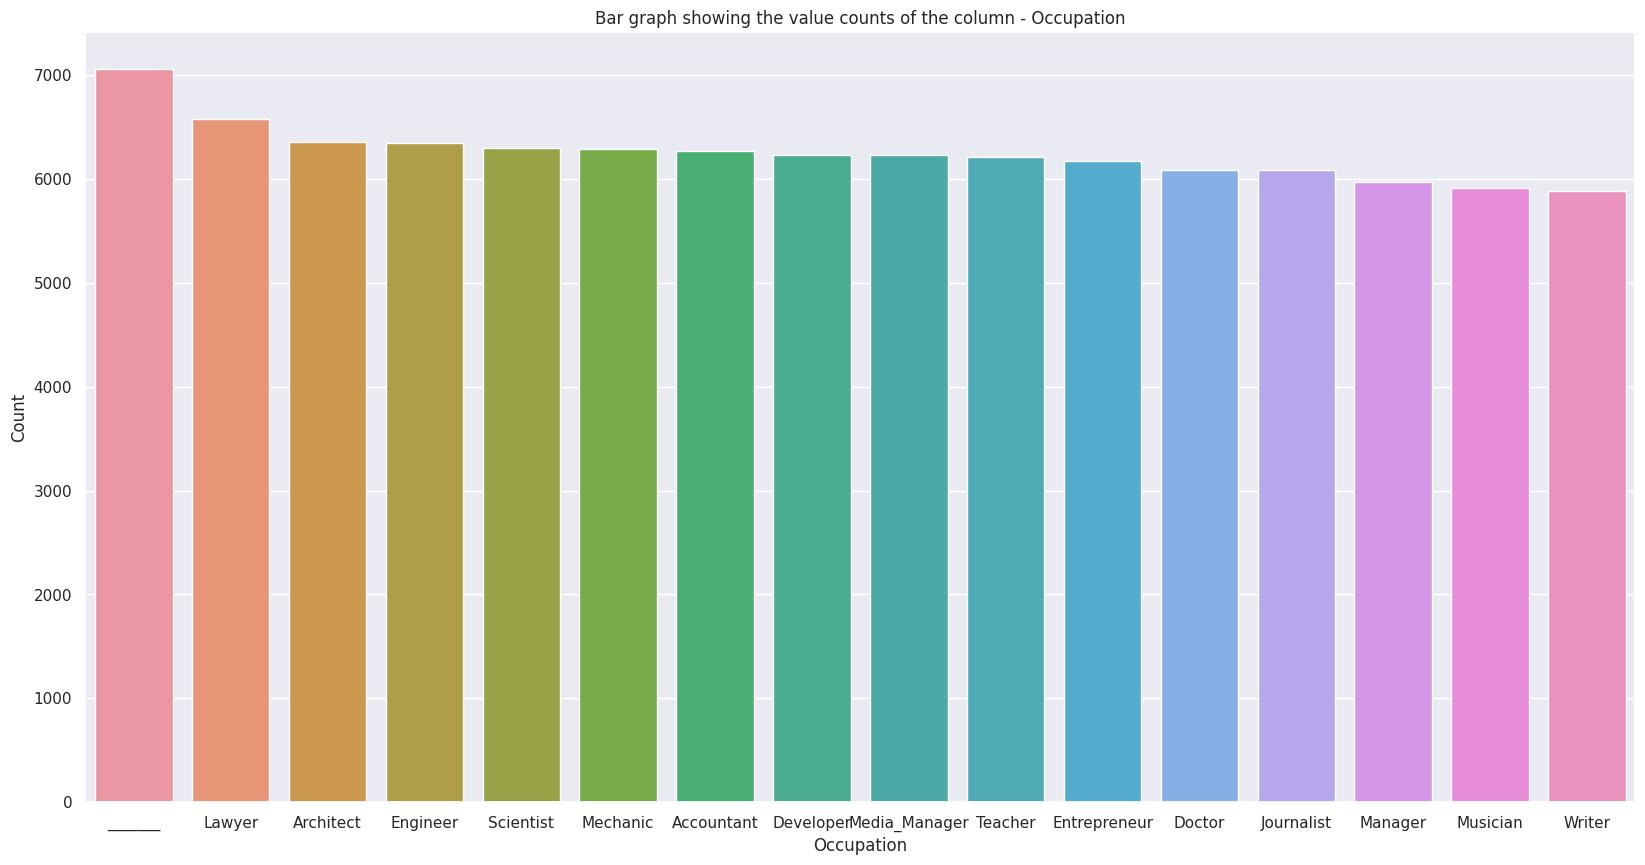

In [24]:
# occupation_count, chart with the number of occupations in the Occupation column
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occ_count.index, y=occ_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)

## Annual_Income

In [25]:
# Remove underscores from the 'Annual_Income' column
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '', regex=False)

# Convert the column to numeric, forcing invalid values to NaN
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

# Fill missing values with the median income
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)



In [26]:
df["Annual_Income"].unique()  

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

## Delay_from_due_date

In [27]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()  # not possible

array([-1, -2, -3, -5, -4])

In [28]:
df['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66])

In [29]:
# Create a new categorical column
def categorize_delay(value):
    if value < 0:
        return 'Early'
    elif value == 0:
        return 'On-time'
    else:
        return 'Late'

df['Delay_Category'] = df['Delay_from_due_date'].apply(categorize_delay)

# Verify the new column
print(df['Delay_Category'].value_counts())


Delay_Category
Late       98214
On-time     1195
Early        591
Name: count, dtype: int64


count   100000.000
mean        21.069
std         14.860
min         -5.000
25%         10.000
50%         18.000
75%         28.000
max         67.000
Name: Delay_from_due_date, dtype: float64


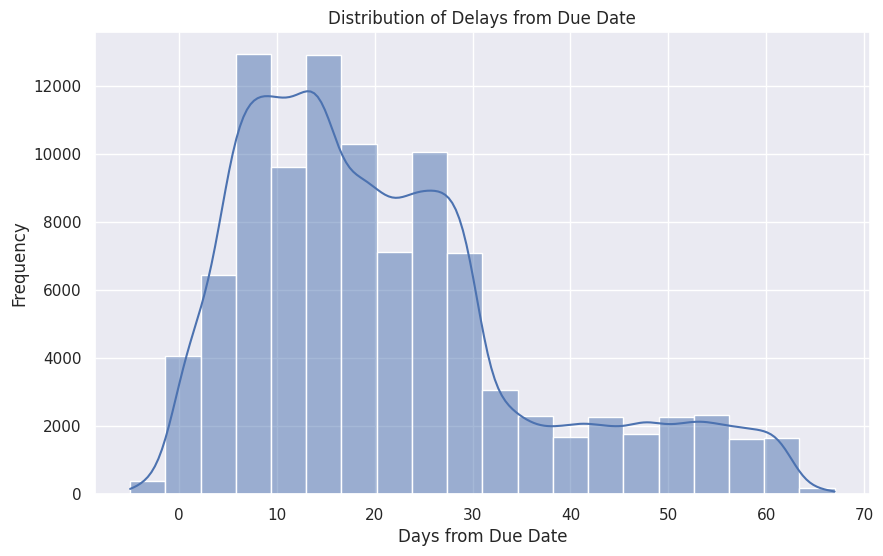

In [30]:
# Summary statistics
print(df['Delay_from_due_date'].describe())

# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Delay_from_due_date'], bins=20, kde=True)
plt.title('Distribution of Delays from Due Date')
plt.xlabel('Days from Due Date')
plt.ylabel('Frequency')
plt.show()


## Num_of_Loan

In [31]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [32]:
# Remove underscores from the 'Num_of_Loan' column
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '', regex=False)
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('-', '', regex=False)

# Verify the changes
print(df['Num_of_Loan'].unique())

['4' '1' '3' '967' '100' '0' '2' '7' '5' '6' '8' '9' '1464' '622' '352'
 '472' '1017' '945' '146' '563' '341' '444' '720' '1485' '49' '737' '1106'
 '466' '728' '313' '843' '597' '617' '119' '663' '640' '92' '1019' '501'
 '1302' '39' '716' '848' '931' '1214' '186' '424' '1001' '1110' '1152'
 '457' '1433' '1187' '52' '1480' '1047' '1035' '1347' '33' '193' '699'
 '329' '1451' '484' '132' '649' '995' '545' '684' '1135' '1094' '1204'
 '654' '58' '348' '614' '1363' '323' '1406' '1348' '430' '153' '1461'
 '905' '1312' '1424' '1154' '95' '1353' '1228' '819' '1006' '795' '359'
 '1209' '590' '696' '1185' '1465' '911' '1181' '70' '816' '1369' '143'
 '1416' '455' '55' '1096' '1474' '420' '1131' '904' '89' '1259' '527'
 '1241' '449' '983' '418' '319' '23' '238' '638' '138' '235' '280' '1070'
 '1484' '274' '494' '1459' '404' '1354' '1495' '1391' '601' '1313' '1319'
 '898' '231' '752' '174' '961' '1046' '834' '284' '438' '288' '1463'
 '1151' '719' '198' '1015' '855' '841' '392' '1444' '103' '1320' '7

In [33]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [34]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan                        8
Student Loan, 

In [35]:
df['Type_of_Loan'].fillna('Unknown', inplace=True)

In [36]:
df["Changed_Credit_Limit"].value_counts()

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
10.06                  121
                      ... 
27.38                    1
21.17                    1
0.8199999999999998       1
30.91                    1
-6.2                     1
Name: count, Length: 4384, dtype: int64

In [37]:
# Convert column to numeric, forcing invalid strings to NaN
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

# Replace negative values with NaN
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: x if x >= 0 else np.nan)

# Fill NaN with the median
df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median(), inplace=True)

In [38]:
df["Changed_Credit_Limit"].unique()

array([11.27,  9.52,  6.27, ..., 17.51, 25.16, 21.17])

## Num_of_Delayed_Payment

In [39]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [40]:
# Remove underscores from the 'Num_of_Delayed_Payment' column
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '', regex=False)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('-', '', regex=False)

In [41]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8', '6', '1', '3', '0', '5', '9', '12', '15', '17',
       '10', '2', '11', '14', '20', '22', '13', '16', '18', '19', '23',
       '24', '21', '3318', '3083', '1338', '26', '3104', '25', '183',
       '1106', '834', '2672', '2008', '538', '27', '3478', '2420', '707',
       '708', '3815', '28', '1867', '2250', '1463', '4126', '2882',
       '1941', '2655', '2628', '132', '3069', '306', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '3764', '851', '3905',
       '923', '88', '1668', '3253', '808', '2689', '3858', '642', '3457',
       '1402', '1732', '3154', '847', '3037', '2204', '3103', '1063',
       '2056', '1282', '1841', '2569', '211', '793', '3484', '411',
       '3491', '2072', '3050', '1049', '2162', '3402', '2753', '1718',
       '1014', '3260', '3855', '84', '2311', '3251', '1832', '4069',
       '3010', '733', '4241', '166', '2461', '1749', '3200', '663',
       

## Changed_Credit_Limit

In [42]:
df['Changed_Credit_Limit'].unique()

array([11.27,  9.52,  6.27, ..., 17.51, 25.16, 21.17])

In [43]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)

In [44]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean(), inplace=True)

## Num_Credit_Inquiries

In [45]:
df['Num_Credit_Inquiries'].unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

In [46]:
df['Num_Credit_Inquiries'].isnull().sum()

0

## Credit_Mix

In [47]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [48]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

def fill_na_cat(data, val):
  
    for col in data.select_dtypes(include='object').columns:
        mode_by_customer = data.groupby('Customer_ID')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        mode_global = data[col].mode()[0]
        data[col] = data[col].fillna(mode_by_customer.fillna(mode_global))
    return data

df = fill_na_cat(data=df, val="Credit_Mix")

In [49]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

## Credit_History_Age

In [50]:
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and 3 Mo

In [51]:
# Convert Credit_History_Age to month
def parse_years_and_months_to_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  


df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months_to_months)
# Fill missing values in total months
df['Credit_History_Age_Months'].fillna(df['Credit_History_Age_Months'].median(), inplace=True)


## Outstanding_Debt

In [52]:
df["Outstanding_Debt"].value_counts()

Outstanding_Debt
1360.45     24
1151.7      23
1109.03     23
460.46      23
796.88      16
            ..
911.67_      1
1344.25_     1
465.88_      1
159.41_      1
412.38_      1
Name: count, Length: 13178, dtype: int64

In [53]:
# Remove underscores from the 'Outstanding_Debt' column
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '', regex=False)

# Convert the column to numeric, forcing invalid values to NaN
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

# Fill NaN with the median
df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median(), inplace=True)

## Amount_invested_monthly

In [54]:
df['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
__10000__             4471
0.0                    213
123.97121912734836       6
141.75831324696026       6
128.39695911810998       5
                      ... 
71.7286488496428         1
143.69928551763815       1
79.40095316699023        1
130.0679586815032        1
152.26454725772234       1
Name: count, Length: 91049, dtype: int64

In [55]:
# Replace special values like "__10000__" with NaN or a numerical value
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__', np.nan)

In [56]:
# Convert the column to numeric, forcing invalid values to NaN
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [57]:
# Fill missing values with the median of the column
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(), inplace=True)


## Num_of_Delayed_Payment

In [58]:
# Convert column to numeric, forcing invalid strings to NaN
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Replace negative values with NaN
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: x if x >= 0 else np.nan)

# Fill NaN with the median
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median(), inplace=True)

## Monthly_Balance

In [59]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
239.59620527100063                  6
652.1891772728834                   5
123.087282473181                    5
141.33006540592768                  5
                                   ..
1279.6106996658787                  1
709.5623900670662                   1
903.1735017218616                   1
1257.0589816726792                  1
645.9806407154709                   1
Name: count, Length: 98792, dtype: int64

In [60]:
# Replace special invalid values with NaN
df['Monthly_Balance'] = df['Monthly_Balance'].replace('_', np.nan, regex=True)
df['Monthly_Balance'] = df['Monthly_Balance'].replace('_', '', regex=True)

In [61]:
# Convert to numeric, forcing invalid entries to NaN
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [62]:
# Fill missing values with the median
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)


## Payment_Behaviour

In [63]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [64]:
# Replace invalid values with NaN
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@#%8', np.nan)

In [65]:
df['Payment_Behaviour'].isna().sum()

0

In [66]:
# Dropping unnecessary columns 

df.drop(["ID", "Name","Customer_ID", "SSN", "Credit_History_Age", "Month", "Type_of_Loan", "Delay_from_due_date"],  axis=1, inplace=True)

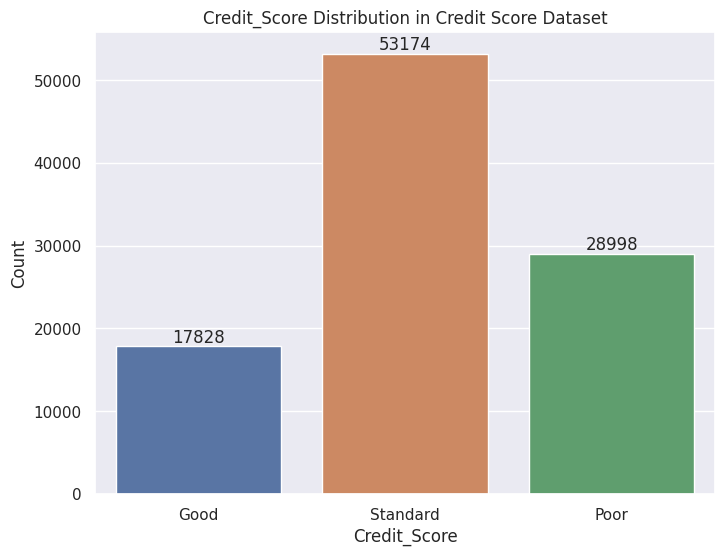

In [67]:
# Distribution of target variable

plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

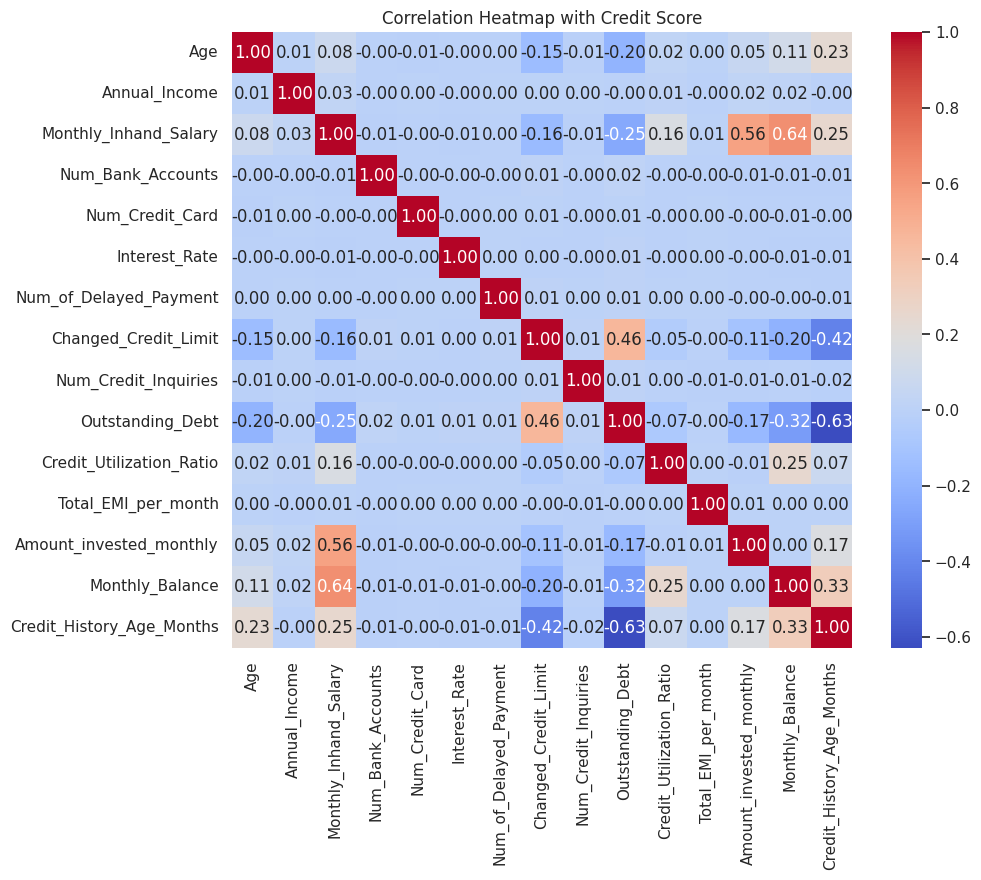

In [68]:
# Correlation matrix

numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

# Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()

In [69]:
# Outliers

df_num = df.select_dtypes(include='number')
for column in df_num.columns:
    for i in df["Credit_Score"].unique():
        selected_i = df[df["Credit_Score"] == i]
        selected_column = selected_i[column]
        
        std = selected_column.std()
        mean= selected_column.mean()
        
        max = mean + (4 * std)
        min =  mean - (4 * std)
        
        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        df.drop(index=outliers, inplace=True)
        print(column, i, outliers)

Age Good Index([28718], dtype='int64')
Age Standard Index([29316, 38248, 65420, 78564], dtype='int64')
Age Poor Index([], dtype='int64')
Annual_Income Good Index([   54,   564,   895,  2684,  3390,  4453,  5254,  5647,  6767,  7420,
       ...
       88289, 88708, 90303, 91686, 93073, 94278, 94336, 96155, 98445, 99264],
      dtype='int64', length=129)
Annual_Income Standard Index([  231,   361,   368,   602,   617,  1253,  1737,  2099,  2303,  2815,
       ...
       98478, 98864, 99107, 99191, 99260, 99280, 99714, 99721, 99882, 99945],
      dtype='int64', length=441)
Annual_Income Poor Index([  862,  1546,  1706,  3100,  3277,  3577,  4446,  4950,  5208,  6162,
       ...
       92902, 93399, 93487, 93662, 93821, 94073, 94114, 95170, 96701, 99432],
      dtype='int64', length=209)
Monthly_Inhand_Salary Good Index([], dtype='int64')
Monthly_Inhand_Salary Standard Index([], dtype='int64')
Monthly_Inhand_Salary Poor Index([ 7107,  7108,  8682,  8683,  8684,  8685,  8687,  8690,  8691, 

In [70]:
# Saving dataset
df.to_csv("Creditscore_train_cleaned.csv", index=False)

In [71]:
df = pd.read_csv("Creditscore_train_cleaned.csv")
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Delay_Category,Credit_History_Age_Months
0,23.000,Scientist,19114.120,1824.843,3,4,3,4,7,11.270,4.000,Good,809.980,26.823,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good,Late,265
1,23.000,Scientist,19114.120,4194.171,3,4,3,4,4,11.270,4.000,Good,809.980,31.945,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,Early,265
2,33.000,Scientist,19114.120,4194.171,3,4,3,4,7,9.520,4.000,Good,809.980,28.609,No,49.575,81.700,Low_spent_Medium_value_payments,331.210,Good,Late,267
3,23.000,Scientist,19114.120,4194.171,3,4,3,4,4,6.270,4.000,Good,809.980,31.378,No,49.575,199.458,Low_spent_Small_value_payments,223.451,Good,Late,268
4,23.000,Scientist,19114.120,1824.843,3,4,3,4,4,11.270,4.000,Good,809.980,24.797,No,49.575,41.420,High_spent_Medium_value_payments,341.489,Good,Late,269


In [72]:
df.sample(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Delay_Category,Credit_History_Age_Months
90295,43.000,Architect,10692.160,817.013,8,4,16,0,12,10.290,4.000,Standard,1350.850,34.609,Yes,0.000,71.942,Low_spent_Large_value_payments,279.760,Standard,Late,384
33144,43.000,Mechanic,10728.400,720.033,6,3,12,0,12,10.950,4.000,Good,1375.350,27.234,NM,0.000,40.421,Low_spent_Medium_value_payments,311.582,Good,Late,194
58862,17.000,Architect,8400.715,418.060,8,10,29,4,22,8.080,10.000,Bad,1414.230,25.526,Yes,19.658,16.977,High_spent_Small_value_payments,265.170,Standard,Late,205
80227,42.000,Engineer,8898.785,4194.171,9,5,30,8,15,5.360,10.000,Bad,1292.140,30.363,Yes,54.340,18.611,High_spent_Small_value_payments,284.405,Poor,Late,104
90044,28.000,Mechanic,17013.290,1326.774,2,1,10,1,1,11.930,3.000,Good,1452.790,39.099,No,34259.000,57.331,Low_spent_Small_value_payments,352.237,Good,Late,389


In [73]:
# Encoding Categorical columns with LabelEncoder

# List of categorical columns to encode
categorical_columns = [
    'Occupation', 
    'Credit_Mix', 
    'Payment_of_Min_Amount', 
    'Payment_Behaviour', 
    'Credit_Score', 
    'Delay_Category'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# Verify the encoding
print(df[categorical_columns].head())


   Occupation  Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour  \
0          12           1                      1                  3   
1          12           1                      1                  4   
2          12           1                      1                  5   
3          12           1                      1                  6   
4          12           1                      1                  2   

   Credit_Score  Delay_Category  
0             0               1  
1             0               0  
2             0               1  
3             0               1  
4             0               1  


In [74]:
# Splitting the dataset into features and target variable.

X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

In [75]:
y.value_counts(normalize=True) # unbalanced data

Credit_Score
2   0.534
1   0.289
0   0.177
Name: proportion, dtype: float64

In [76]:
print(X.dtypes)


Age                          float64
Occupation                     int64
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Num_of_Delayed_Payment         int64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                     int64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount          int64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour              int64
Monthly_Balance              float64
Delay_Category                 int64
Credit_History_Age_Months      int64
dtype: object


In [77]:
# make smote for unbalanced data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [78]:
y.value_counts()

Credit_Score
0    48274
2    48274
1    48274
Name: count, dtype: int64

### Train test split


In [79]:
# Splitting the data into training and testing sets using the train_test_split function 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.preprocessing import MinMaxScaler 
# Normalization
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# ANN Model


In [82]:
# Model architecture

model = Sequential([
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(512, activation='relu'),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation='relu'),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.1),
    
    Dense(3, activation='softmax')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping with patience and best weight restoration
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=35,
                               restore_best_weights=True)

# Model training
history = model.fit(x=X_train,
                    y=y_train,
                    validation_data=(X_test, y_test),
                    validation_split=0.2,
                    batch_size=512,
                    epochs=900,
                    verbose=1,
                    callbacks=[early_stopping])    


Epoch 1/900
227/227 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.3537 - loss: 1.3165 - val_accuracy: 0.3354 - val_loss: 1.3121
Epoch 2/900
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4479 - loss: 1.0767 - val_accuracy: 0.3354 - val_loss: 1.4844
Epoch 3/900
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5247 - loss: 0.9714 - val_accuracy: 0.5318 - val_loss: 1.0517
Epoch 4/900
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5861 - loss: 0.9001 - val_accuracy: 0.6630 - val_loss: 0.8331
Epoch 5/900
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6351 - loss: 0.8490 - val_accuracy: 0.7147 - val_loss: 0.7568
Epoch 6/900
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6733 - loss: 0.8083 - val_accuracy: 0.7255 - val_loss: 0.7299
Epoch 7/900
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6903 - loss: 0.7865 - val_accuracy: 0.7310 - val_loss: 0.7134
Epoch 8/900
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7072 - loss: 0.7641 - val_ac

In [83]:
model.evaluate(X_train, y_train)

3621/3621 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8856 - loss: 0.2918


[0.29287323355674744, 0.8852982521057129]

In [84]:
eval_metric(model, X_train, y_train, X_test, y_test)

3621/3621 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test Set:
[[9174   97  443]
 [ 614 8065  898]
 [1559 1749 6366]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      9714
           1       0.81      0.84      0.83      9577
           2       0.83      0.66      0.73      9674

    accuracy                           0.81     28965
   macro avg       0.82      0.81      0.81     28965
weighted avg       0.82      0.81      0.81     28965


Train Set:
[[37968    19   573]
 [  790 35665  2242]
 [ 4040  5625 28935]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     38560
           1       0.86      0.92      0.89     38697
           2       0.91      0.75      0.82     38600

    accuracy                           0.89    115857
   macro avg       0.89      0.89      0.88    115857
weighted avg       0.89      0.89      0.88    115857



In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │              

 Total params: 2,062,731 (7.87 MB)

 Trainable params: 686,467 (2.62 MB)

 Non-trainable params: 3,328 (13.00 KB)

 Optimizer params: 1,372,936 (5.24 MB)

<Axes: title={'center': 'Model Loss'}>

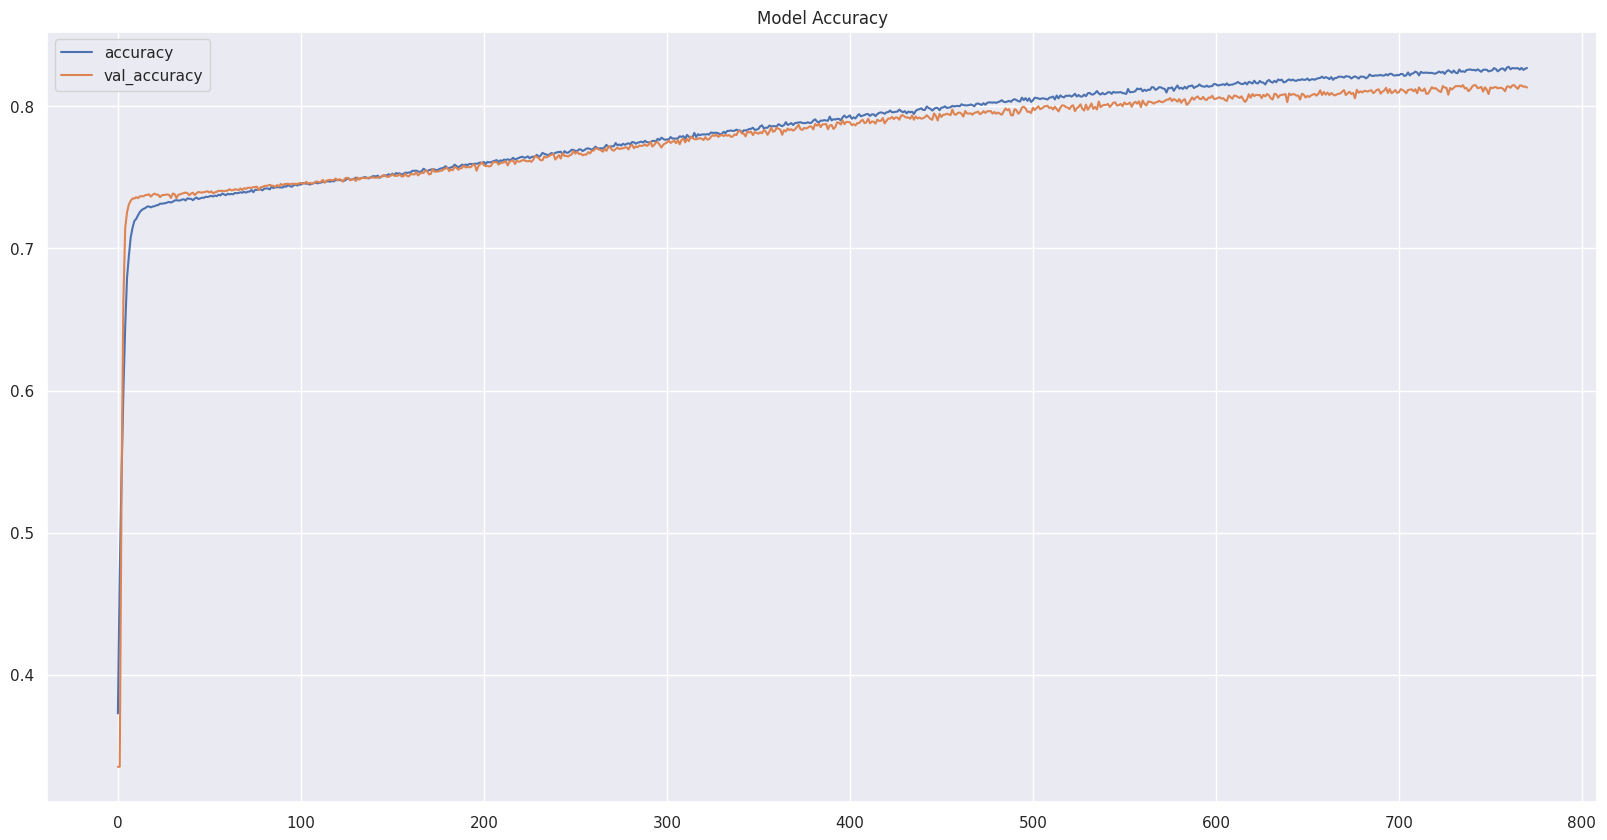

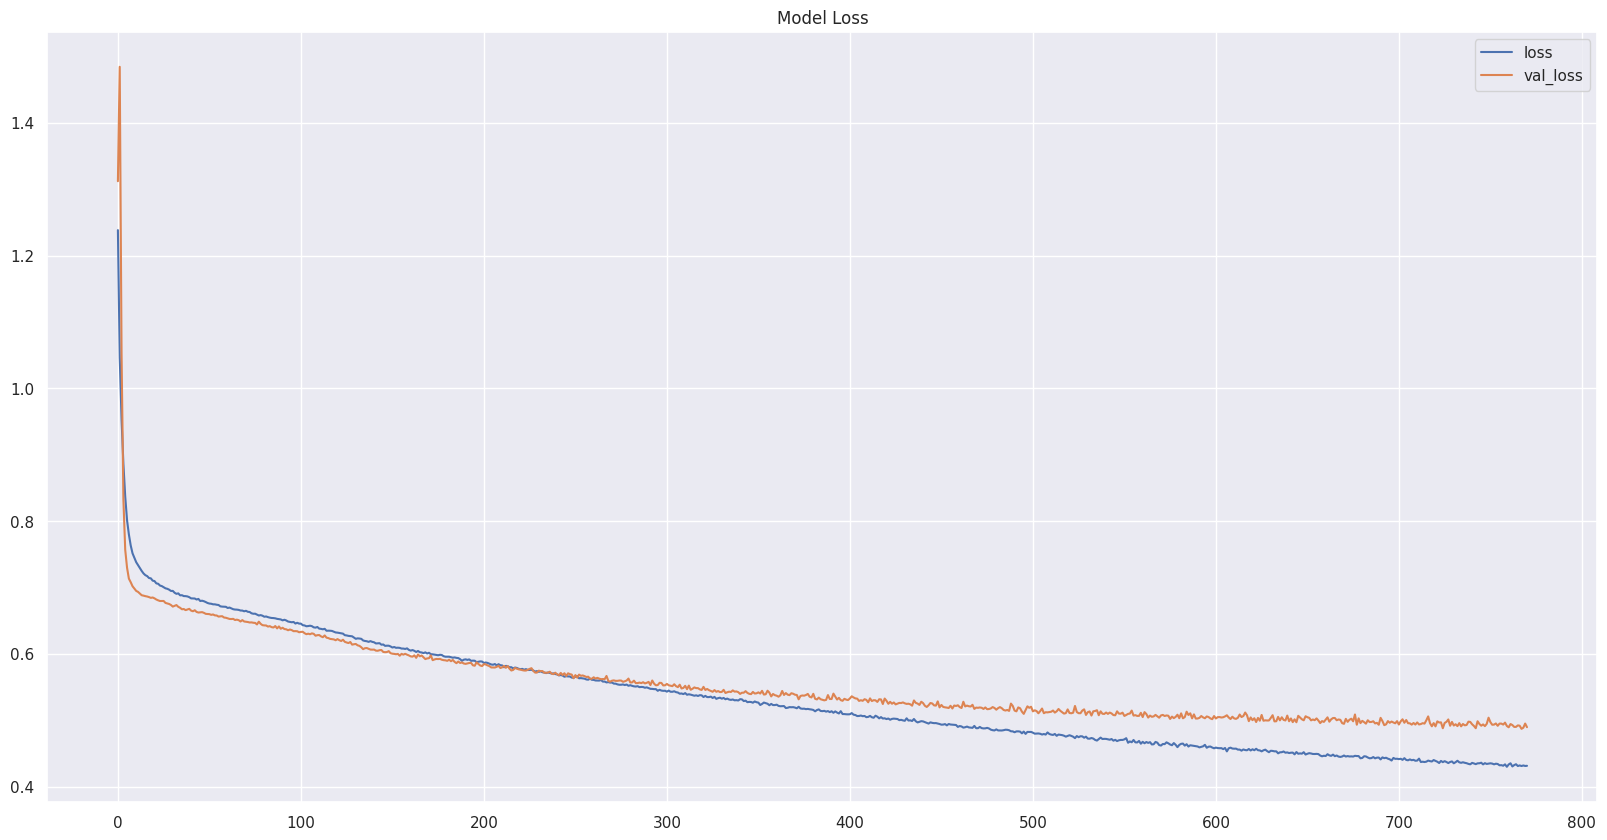

In [86]:
# Convert history to DataFrame
Acc_df = pd.DataFrame(history.history)

# Plot accuracy and loss
Acc_df[['accuracy', 'val_accuracy']].plot(title='Model Accuracy')
Acc_df[['loss', 'val_loss']].plot(title='Model Loss')

In [87]:
# Without using BatchNormalization()

model1 = Sequential([
    
    Dense(256,input_dim=X_train.shape[1], activation='relu'),
    #BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    
    Dense(128, activation='relu'),
    #BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    #Dropout(0.3),
    
    Dense(128, activation='relu'), 
    BatchNormalization(),
    #Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    #Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    #Dropout(0.2),
    
    Dense(3, activation='softmax')
])
model1.compile(optimizer = Adam(learning_rate=0.0003), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])





early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=50,
                               restore_best_weights=True)
history = model1.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          validation_split=0.15,
          batch_size=128,
          epochs=800,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/800
906/906 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5244 - loss: 1.0670 - val_accuracy: 0.7283 - val_loss: 0.7050
Epoch 2/800
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7093 - loss: 0.7481 - val_accuracy: 0.7350 - val_loss: 0.6887
Epoch 3/800
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7231 - loss: 0.7218 - val_accuracy: 0.7365 - val_loss: 0.6828
Epoch 4/800
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7280 - loss: 0.7073 - val_accuracy: 0.7351 - val_loss: 0.6786
Epoch 5/800
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7279 - loss: 0.7022 - val_accuracy: 0.7362 - val_loss: 0.6748
Epoch 6/800
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7320 - loss: 0.6909 - val_accuracy: 0.7278 - val_loss: 0.6761
Epoch 7/800
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7328 - loss: 0.6884 - val_accuracy: 0.7385 - val_loss: 0.6652
Epoch 8/800
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7311 - loss: 0.6878 - val_acc

In [88]:
model1.evaluate(X_train, y_train)

3621/3621 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9139 - loss: 0.2552


[0.25611695647239685, 0.9129703044891357]

In [89]:
eval_metric(model1, X_train, y_train, X_test, y_test)

3621/3621 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[8923  165  626]
 [ 484 8192  901]
 [1336 1858 6480]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      9714
           1       0.80      0.86      0.83      9577
           2       0.81      0.67      0.73      9674

    accuracy                           0.81     28965
   macro avg       0.81      0.81      0.81     28965
weighted avg       0.81      0.81      0.81     28965


Train Set:
[[37845   107   608]
 [  465 36702  1530]
 [ 2270  5103 31227]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     38560
           1       0.88      0.95      0.91     38697
           2       0.94      0.81      0.87     38600

    accuracy                           0.91    115857
   macro avg       0.91      0.91      0.91    115857
weighted avg       0.91      0.91      0.91    115857



<Axes: title={'center': 'Model Loss'}>

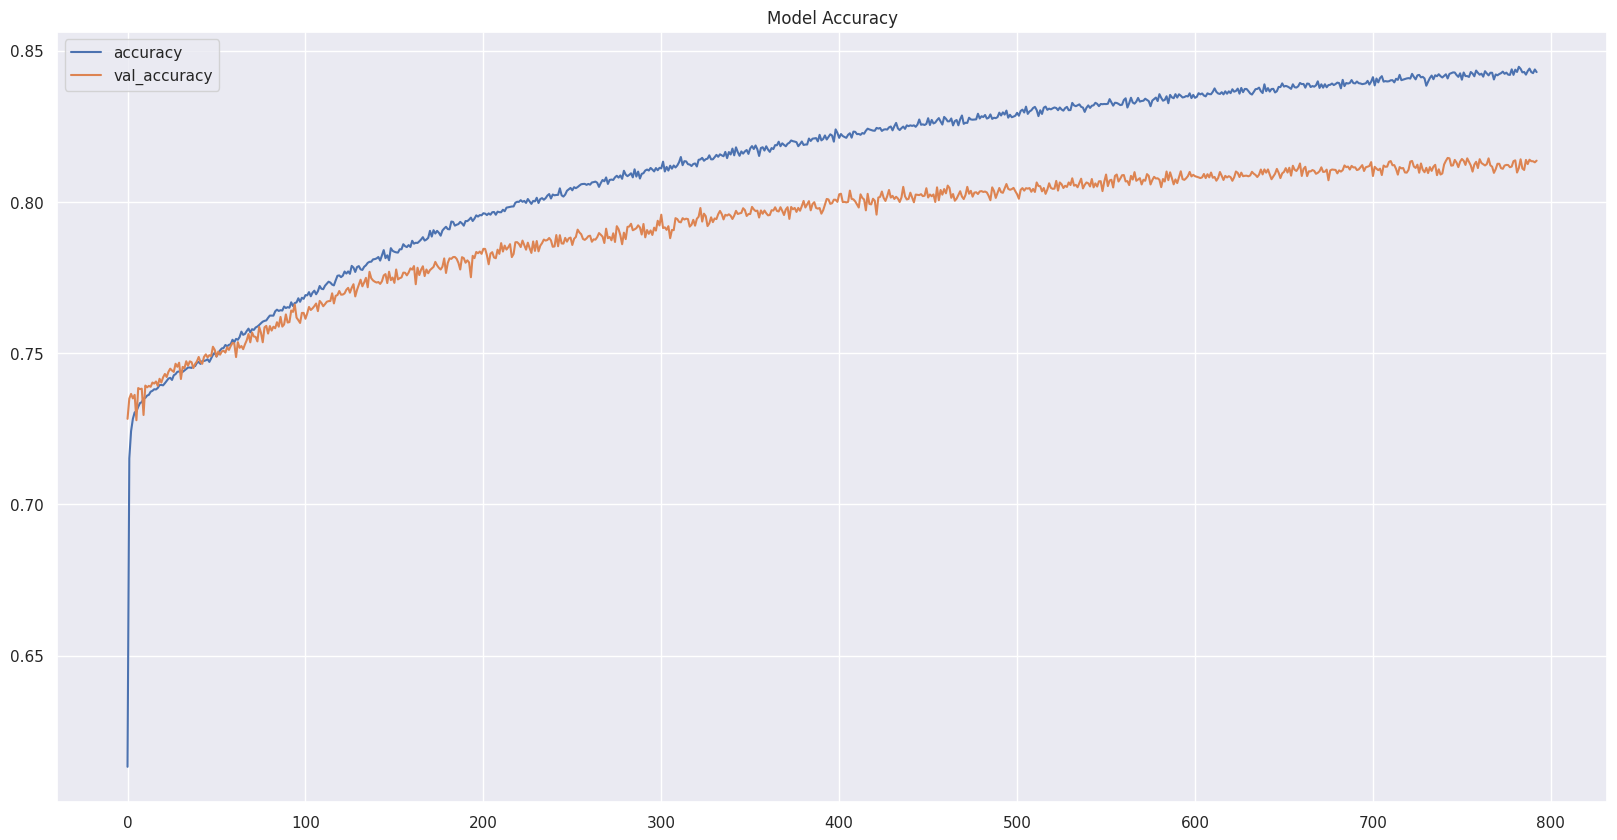

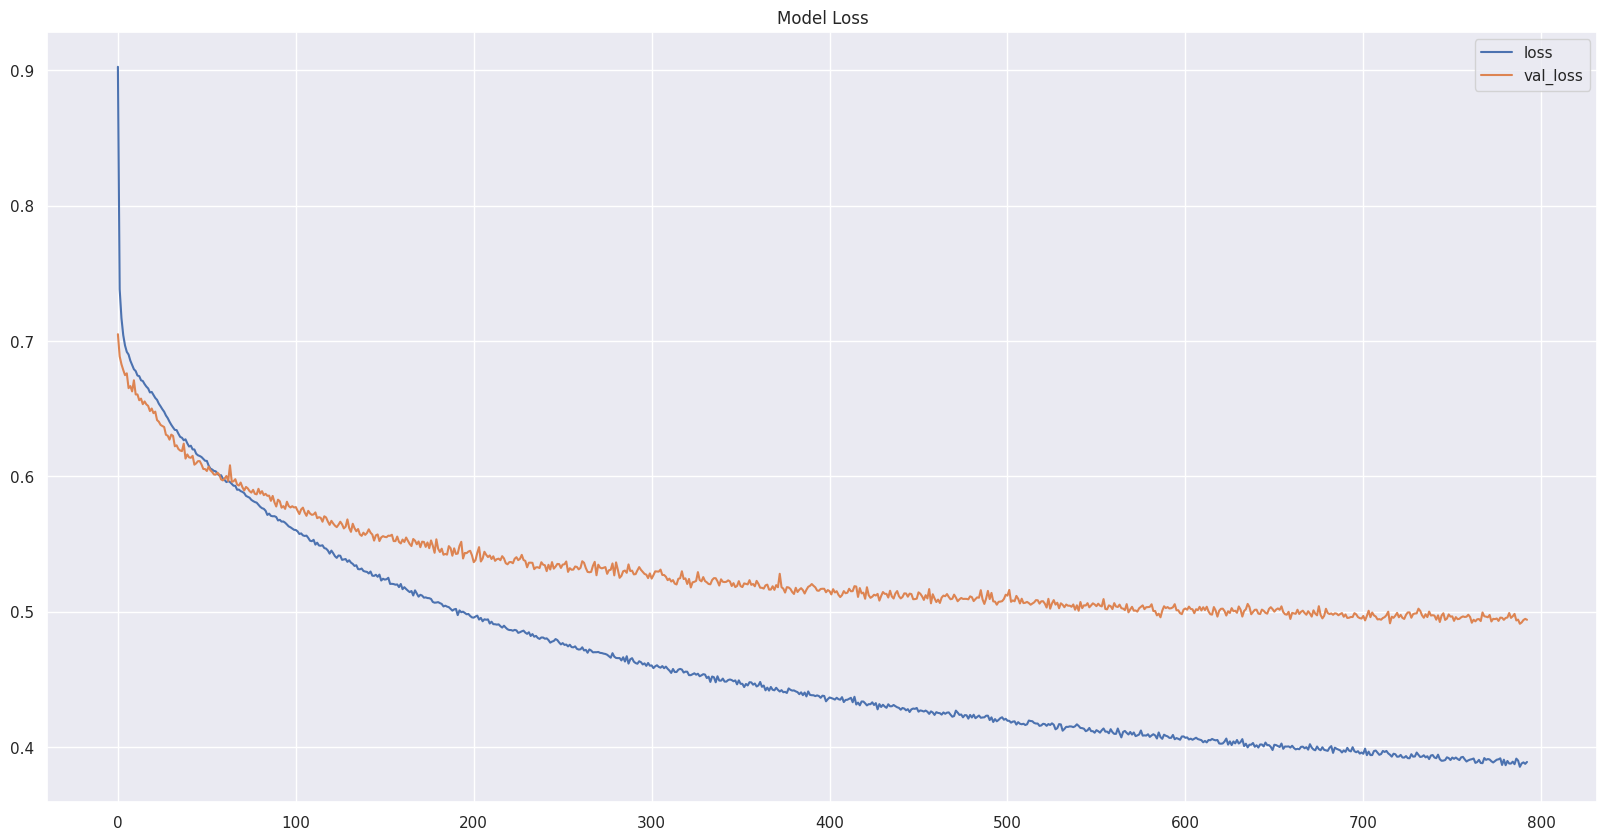

In [90]:
# Convert history to DataFrame
Acc_df = pd.DataFrame(history.history)

# Plot accuracy and loss
Acc_df[['accuracy', 'val_accuracy']].plot(title='Model Accuracy')
Acc_df[['loss', 'val_loss']].plot(title='Model Loss')

In [91]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 256)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           1,0

 Total params: 698,539 (2.66 MB)

 Trainable params: 232,419 (907.89 KB)

 Non-trainable params: 1,280 (5.00 KB)

 Optimizer params: 464,840 (1.77 MB)

In [92]:
# Without using BatchNormalization()

model2 = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    
    Dense(256, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),

    Dense(256, activation='relu'),
    
    Dense(128, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(128, activation='relu'), 
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(64, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.2),

    
    Dense(32, activation='relu'),
    
    Dense(3, activation='softmax')
])

model2.compile(optimizer = Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])





early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=70,
                               restore_best_weights=True)
model2.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          validation_split=0.15,
          batch_size=256,
          epochs=900,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/900
453/453 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6533 - loss: 0.8725 - val_accuracy: 0.7322 - val_loss: 0.6950
Epoch 2/900
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7357 - loss: 0.6873 - val_accuracy: 0.7358 - val_loss: 0.6830
Epoch 3/900
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7362 - loss: 0.6815 - val_accuracy: 0.7348 - val_loss: 0.6757
Epoch 4/900
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7393 - loss: 0.6707 - val_accuracy: 0.7368 - val_loss: 0.6696
Epoch 5/900
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7374 - loss: 0.6713 - val_accuracy: 0.7398 - val_loss: 0.6637
Epoch 6/900
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7388 - loss: 0.6656 - val_accuracy: 0.7387 - val_loss: 0.6638
Epoch 7/900
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7384 - loss: 0.6651 - val_accuracy: 0.7389 - val_loss: 0.6675
Epoch 8/900
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7426 - loss: 0.6596 - val_accu

In [93]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 512)                 │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 804,683 (3.07 MB)

 Trainable params: 268,227 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 536,456 (2.05 MB)

In [94]:
model2.evaluate(X_train, y_train)

3621/3621 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8774 - loss: 0.3074


[0.3104974925518036, 0.8757520318031311]

In [95]:
eval_metric(model2, X_train, y_train, X_test, y_test)

3621/3621 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Set:
[[8570  328  816]
 [ 686 7834 1057]
 [1528 2136 6010]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84      9714
           1       0.76      0.82      0.79      9577
           2       0.76      0.62      0.68      9674

    accuracy                           0.77     28965
   macro avg       0.77      0.77      0.77     28965
weighted avg       0.77      0.77      0.77     28965


Train Set:
[[37276   200  1084]
 [ 1002 35228  2467]
 [ 3305  6337 28958]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     38560
           1       0.84      0.91      0.88     38697
           2       0.89      0.75      0.81     38600

    accuracy                           0.88    115857
   macro avg       0.88      0.88      0.87    115857
weighted avg       0.88      0.88      0.87    115857



<Axes: title={'center': 'Model Loss'}>

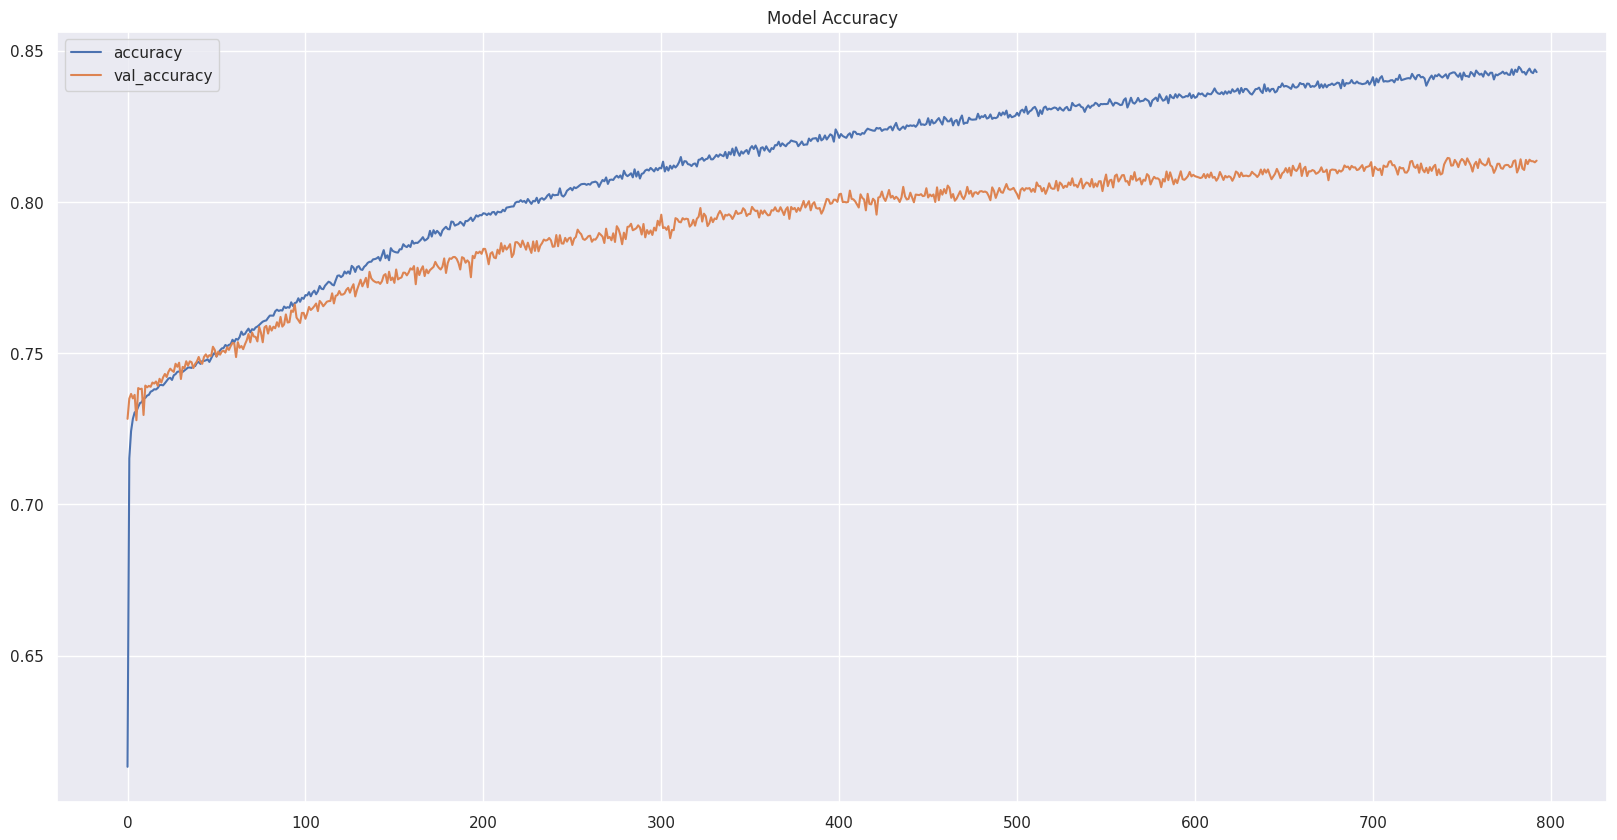

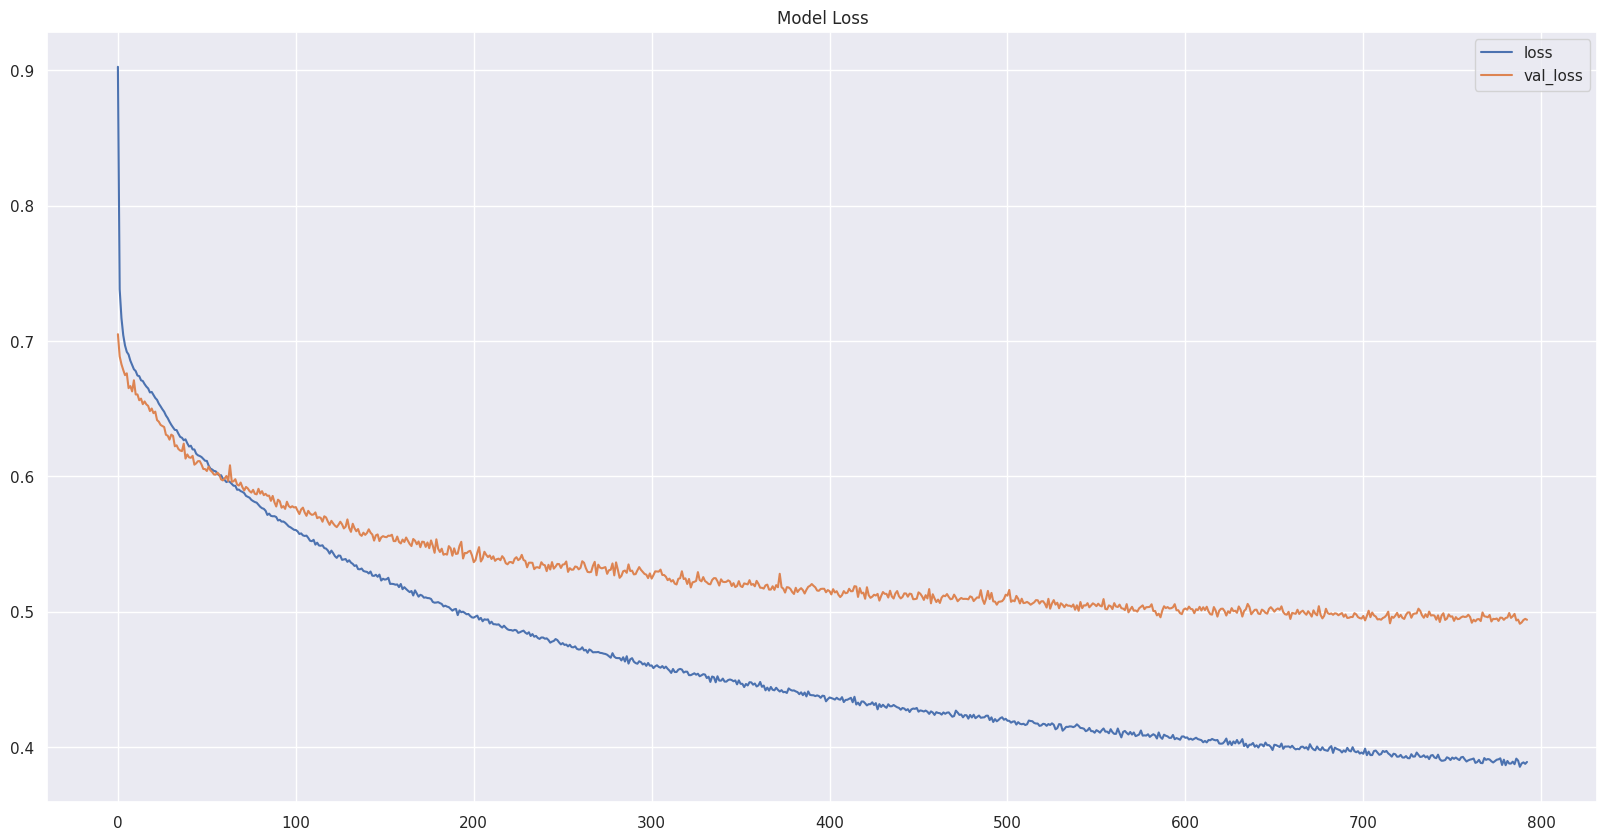

In [96]:
# Convert history to DataFrame
Acc_df = pd.DataFrame(history.history)

# Plot accuracy and loss
Acc_df[['accuracy', 'val_accuracy']].plot(title='Model Accuracy')
Acc_df[['loss', 'val_loss']].plot(title='Model Loss')

In [97]:
# Model architecture

model3 = Sequential([
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(3, activation='softmax')
])

# Model compilation
model3.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping with patience and best weight restoration
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=35,
                               restore_best_weights=True)


# Model training
history3 = model3.fit(x=X_train,
                    y=y_train,
                    validation_data=(X_test, y_test),
                    validation_split=0.2,
                    batch_size=1024,
                    epochs=500,
                    verbose=1,
                    callbacks=[early_stopping])    


Epoch 1/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.4543 - loss: 1.2667 - val_accuracy: 0.3354 - val_loss: 1.1757
Epoch 2/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6359 - loss: 0.8971 - val_accuracy: 0.3354 - val_loss: 1.3575
Epoch 3/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6872 - loss: 0.8058 - val_accuracy: 0.4693 - val_loss: 1.0370
Epoch 4/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7084 - loss: 0.7699 - val_accuracy: 0.6892 - val_loss: 0.7688
Epoch 5/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7167 - loss: 0.7469 - val_accuracy: 0.7291 - val_loss: 0.6983
Epoch 6/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7212 - loss: 0.7350 - val_accuracy: 0.7334 - val_loss: 0.6870
Epoch 7/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7268 - loss: 0.7260 - val_accuracy: 0.7356 - val_loss: 0.6808
Epoch 8/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7280 - loss: 0.7196 - val_ac

In [98]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 512)                 │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,028,107 (3.92 MB)

 Trainable params: 341,571 (1.30 MB)

 Non-trainable params: 3,392 (13.25 KB)

 Optimizer params: 683,144 (2.61 MB)

In [99]:
model3.evaluate(X_train, y_train)

3621/3621 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9388 - loss: 0.1742


[0.17498962581157684, 0.93850177526474]

In [100]:
eval_metric(model3, X_train, y_train, X_test, y_test)

3621/3621 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[8978  140  596]
 [ 393 8282  902]
 [1278 1719 6677]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      9714
           1       0.82      0.86      0.84      9577
           2       0.82      0.69      0.75      9674

    accuracy                           0.83     28965
   macro avg       0.83      0.83      0.82     28965
weighted avg       0.83      0.83      0.82     28965


Train Set:
[[38180    18   362]
 [  134 37531  1032]
 [ 1596  3983 33021]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     38560
           1       0.90      0.97      0.94     38697
           2       0.96      0.86      0.90     38600

    accuracy                           0.94    115857
   macro avg       0.94      0.94      0.94    115857
weighted avg       0.94      0.94      0.94    115857



<Axes: title={'center': 'Model Loss'}>

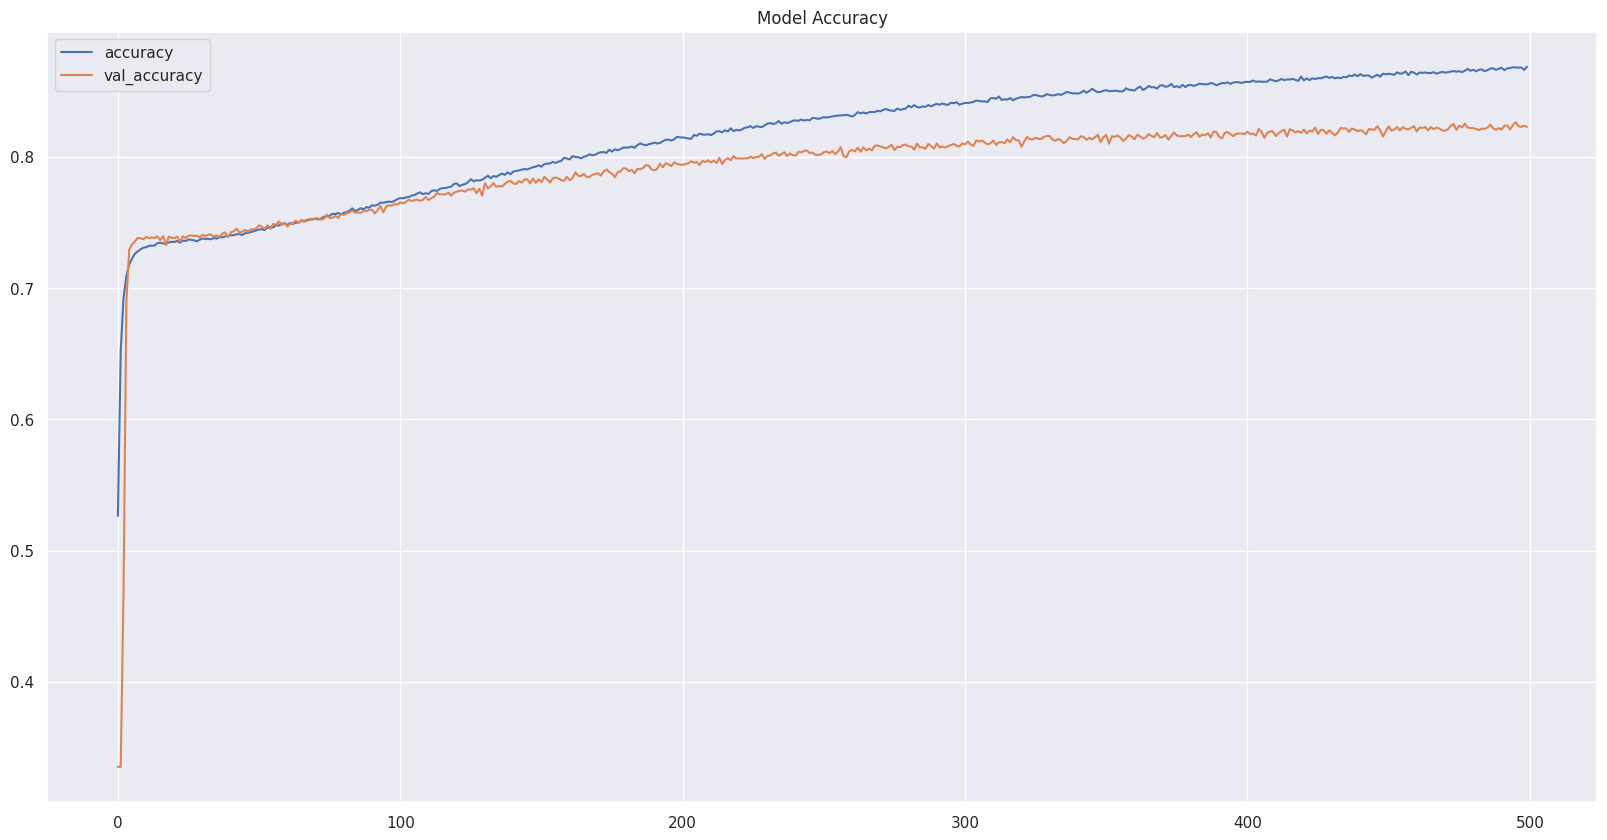

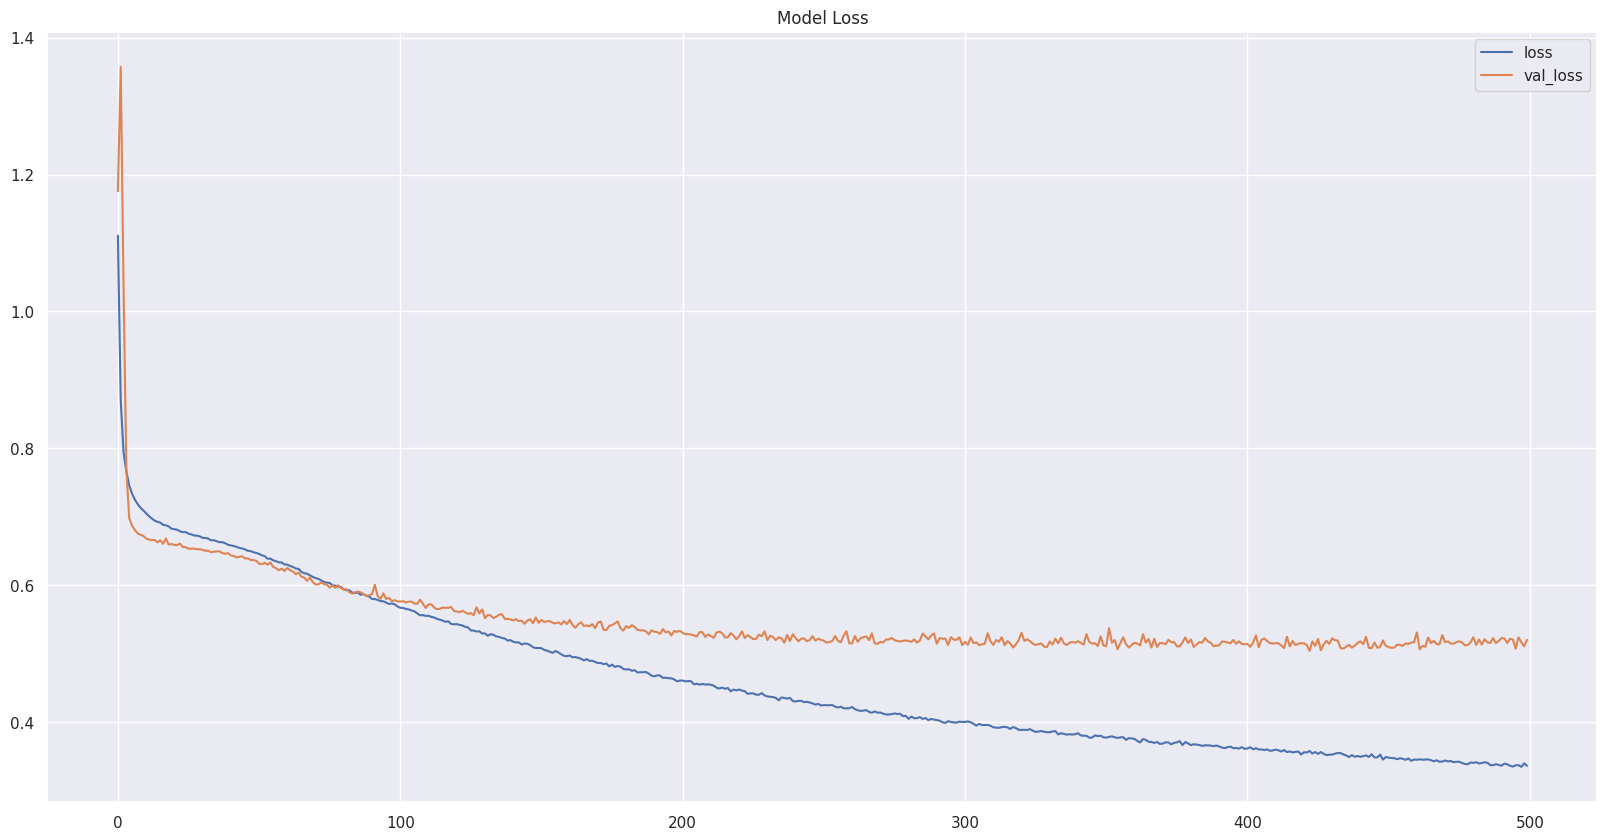

In [101]:
# Convert history to DataFrame
Acc_df = pd.DataFrame(history3.history)

# Plot accuracy and loss
Acc_df[['accuracy', 'val_accuracy']].plot(title='Model Accuracy')
Acc_df[['loss', 'val_loss']].plot(title='Model Loss')

# Saving Final Model

In [102]:
import pickle

scaler = MinMaxScaler().fit(X)

pickle.dump(scaler, open("scaler_credit_score_classification", 'wb'))

In [103]:
X_scaled = scaler.transform(X)

In [104]:
# Without using BatchNormalization()

model2 = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    
    Dense(256, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),

    Dense(256, activation='relu'),
    
    Dense(128, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(128, activation='relu'), 
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(64, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.2),

    
    Dense(32, activation='relu'),
    
    Dense(3, activation='softmax')
])

model2.compile(optimizer = Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])





early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=70,
                               restore_best_weights=True)

history = model2.fit(x=X_scaled,
                    y=y,
                    validation_split=0.15,
                    batch_size=256,
                    epochs=900,
                    verbose=1,
                    callbacks=[early_stopping])   

Epoch 1/900
481/481 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6276 - loss: 0.8474 - val_accuracy: 0.6407 - val_loss: 0.9122
Epoch 2/900
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7394 - loss: 0.6694 - val_accuracy: 0.6108 - val_loss: 0.9733
Epoch 3/900
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7432 - loss: 0.6565 - val_accuracy: 0.6226 - val_loss: 0.9347
Epoch 4/900
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7452 - loss: 0.6512 - val_accuracy: 0.6277 - val_loss: 0.9672
Epoch 5/900
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7457 - loss: 0.6476 - val_accuracy: 0.6042 - val_loss: 0.9910
Epoch 6/900
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7462 - loss: 0.6439 - val_accuracy: 0.5929 - val_loss: 1.0287
Epoch 7/900
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7456 - loss: 0.6452 - val_accuracy: 0.5974 - val_loss: 1.0024
Epoch 8/900
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7476 - loss: 0.6396 - val_accu

<Axes: >

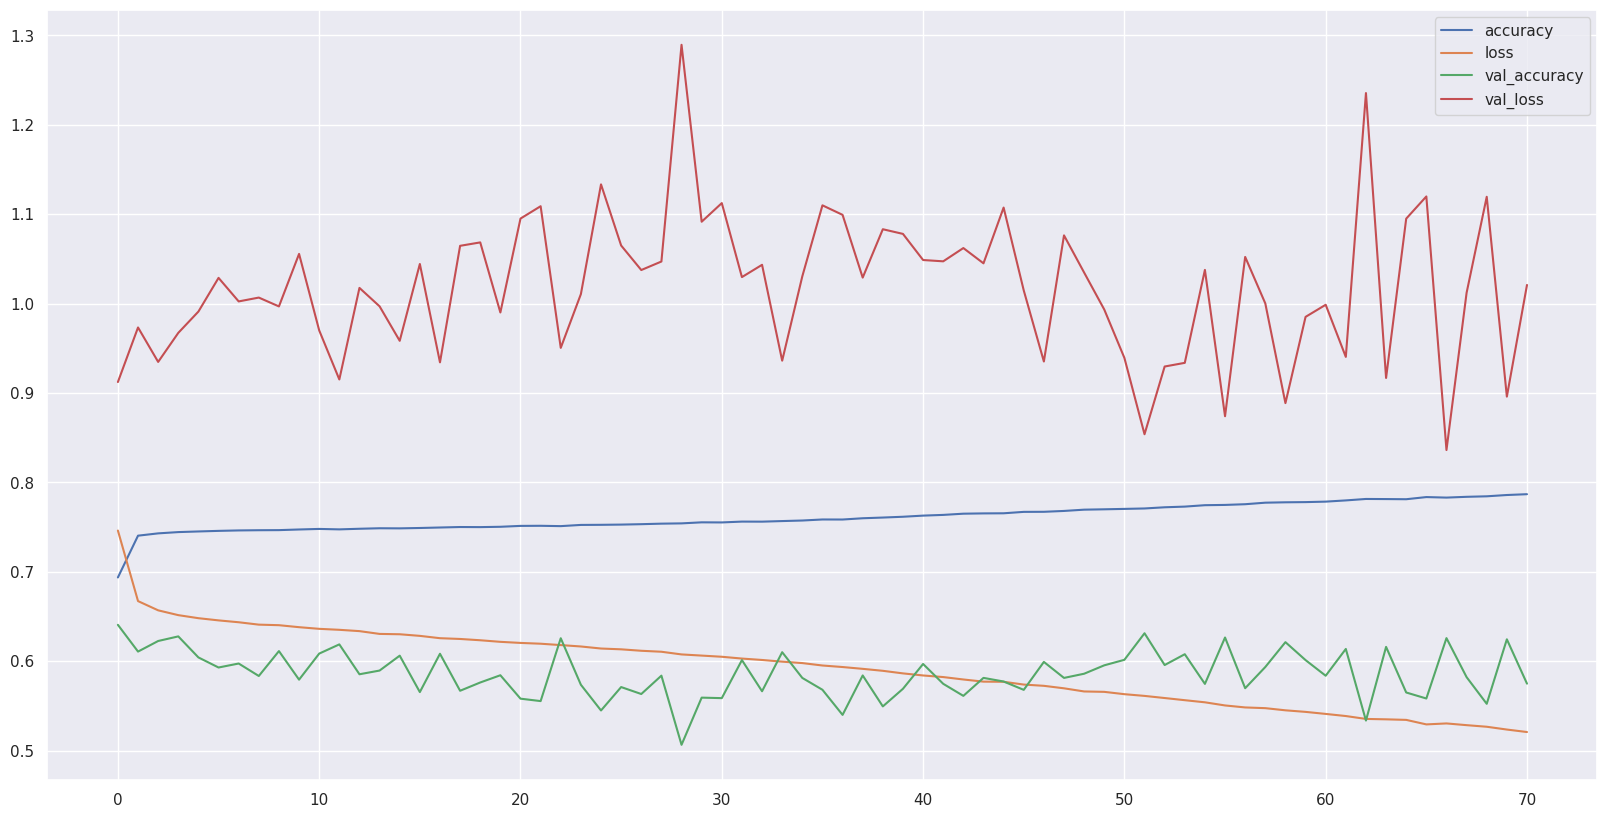

In [105]:
Acc_df = pd.DataFrame(model2.history.history)
Acc_df.plot()

In [106]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [107]:
y_pred = model2.predict(X_scaled)

4526/4526 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [108]:
from tensorflow.keras.saving import save_model

save_model(model2, 'credit_score_classification.keras')

## Loading Model

In [109]:
from tensorflow.keras.models import load_model

credit_score_classification = load_model('credit_score_classification.keras')

scaler_kc_house = pickle.load(open("scaler_credit_score_classification", "rb"))


## Prediction

In [110]:
# Function to generate synthetic data suitable for prediction
def generate_synthetic_data(df, num_samples=50):
    synthetic_data = pd.DataFrame()

    for column in df.columns:
        if column != 'credit_score':  # Excluding the target column if present
            # Extract statistics from your current dataset
            min_val = df[column].min()
            max_val = df[column].max()
            mean_val = df[column].mean()
            std_val = df[column].std()

            # Generate random data suitable for statistics
            synthetic_data[column] = np.random.normal(loc=mean_val, scale=std_val, size=num_samples)

            # Clip the generated data to match the range of the original dataset
            synthetic_data[column] = synthetic_data[column].clip(lower=min_val, upper=max_val)

    return synthetic_data

# Generating 50 rows of synthetic data for prediction
num_samples = 50
df_prediction = generate_synthetic_data(df, num_samples=num_samples)

# Display the generated synthetic data
print(df_prediction.head())


     Age  Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 14.000      12.220       7005.930               4115.468             21.007   
1 27.800       0.402     194896.561               1010.099             20.887   
2 43.949       0.000      53081.652               5538.416             55.153   
3 14.000       4.192      50102.707               2338.832             13.593   
4 35.400       5.052      94864.274               4674.281              5.071   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Num_of_Delayed_Payment  \
0           14.480          1.000        0.000                   0.000   
1           60.698         55.352       23.550                  41.871   
2            0.000          9.940       16.642                   4.794   
3            0.000        164.054        0.000                   0.000   
4           35.307        115.823       68.036                   0.000   

   Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstandi

In [111]:
credit_score = df_prediction.drop('Credit_Score', axis = 1)

df_prediction_scaled = scaler.transform(credit_score)

credit_score_classification.predict(df_prediction_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


array([[0.2765494 , 0.06695326, 0.6564973 ],
       [0.09191745, 0.4518622 , 0.4562204 ],
       [0.02976013, 0.77218807, 0.19805184],
       [0.37208417, 0.20038307, 0.4275328 ],
       [0.0910762 , 0.20864859, 0.70027524],
       [0.11967032, 0.51741236, 0.3629173 ],
       [0.11759464, 0.5689238 , 0.31348157],
       [0.15104638, 0.5822578 , 0.2666958 ],
       [0.6893045 , 0.07911132, 0.23158418],
       [0.7482677 , 0.13124938, 0.12048291],
       [0.15906303, 0.09436876, 0.74656826],
       [0.01205674, 0.64216495, 0.34577835],
       [0.05993445, 0.49907824, 0.4409873 ],
       [0.58113116, 0.09367607, 0.32519278],
       [0.47707608, 0.09209917, 0.43082473],
       [0.09404851, 0.13607468, 0.76987684],
       [0.8039913 , 0.083942  , 0.11206674],
       [0.18217134, 0.63454795, 0.18328065],
       [0.26210815, 0.18936695, 0.5485249 ],
       [0.4165691 , 0.10438376, 0.4790471 ],
       [0.16136023, 0.55890185, 0.27973798],
       [0.8626917 , 0.05736686, 0.07994138],
       [0.

In [112]:
y_pred_probabilities = credit_score_classification.predict(df_prediction_scaled)

y_pred = y_pred_probabilities.argmax(axis=1) # prediction values

normalized_predictions = tf.nn.softmax(y_pred_probabilities, axis=-1).numpy()
# normalized probabilites of each class

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [113]:
pred_df = pd.DataFrame({'pred': y_pred})

# Mapping dictionary for the reverse transformation
mapping = {2: 'Good', 1: 'Standard', 0: 'Poor'}

# Apply the mapping
pred_df["pred"] = pred_df["pred"] .map(mapping)

pred_df["pred_proba_poor"] = normalized_predictions[:,0]
pred_df["pred_proba_standard"] = normalized_predictions[:,1]
pred_df["pred_proba_good"] = normalized_predictions[:,2]
pred_df

,pred,pred_proba_poor,pred_proba_standard,pred_proba_good
0,Good,0.306,0.248,0.447
1,Good,0.258,0.370,0.372
2,Standard,0.233,0.490,0.276
3,Good,0.345,0.291,0.365
4,Good,0.252,0.284,0.464
5,Standard,0.266,0.395,0.339
6,Standard,0.264,0.415,0.321
7,Standard,0.273,0.420,0.307
8,Poor,0.460,0.250,0.291
9,Poor,0.482,0.260,0.257
